We stack glasses in a pyramid, where the first row has 1 glass, the second row has 2 glasses, and so on until the 100th row.  Each glass holds one cup (250ml) of champagne.

Then, some champagne is poured in the first glass at the top.  When the topmost glass is full, any excess liquid poured will fall equally to the glass immediately to the left and right of it.  When those glasses become full, any excess champagne will fall equally to the left and right of those glasses, and so on.  (A glass at the bottom row has its excess champagne fall on the floor.)

For example, after one cup of champagne is poured, the top most glass is full.  After two cups of champagne are poured, the two glasses on the second row are half full.  After three cups of champagne are poured, those two cups become full - there are 3 full glasses total now.  After four cups of champagne are poured, the third row has the middle glass half full, and the two outside glasses are a quarter full, as pictured below.

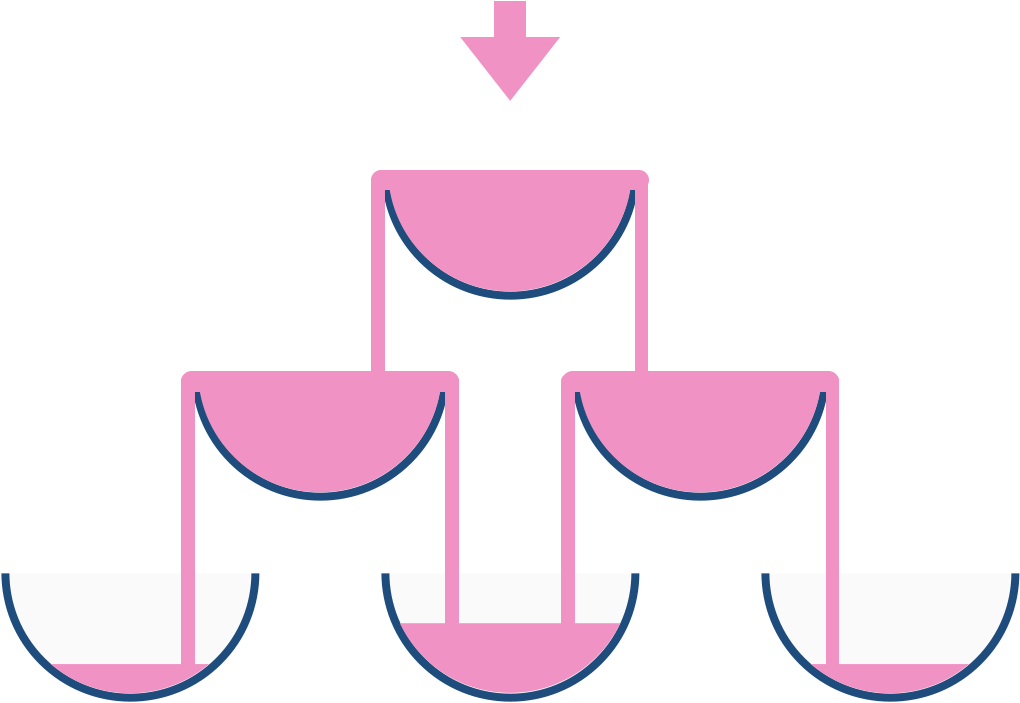

Now after pouring some non-negative integer cups of champagne, return how full the jth glass in the ith row is (both i and j are 0-indexed.)

 

Example 1:
```python
Input: poured = 1, query_row = 1, query_glass = 1
Output: 0.00000
Explanation: We poured 1 cup of champange to the top glass of the tower (which is indexed as (0, 0)). There will be no excess liquid so all the glasses under the top glass will remain empty.
 ```
Example 2:
```python
Input: poured = 2, query_row = 1, query_glass = 1
Output: 0.50000
Explanation: We poured 2 cups of champange to the top glass of the tower (which is indexed as (0, 0)). There is one cup of excess liquid. The glass indexed as (1, 0) and the glass indexed as (1, 1) will share the excess liquid equally, and each will get half cup of champange.
```
Example 3:
```python
Input: poured = 100000009, query_row = 33, query_glass = 17
Output: 1.00000
``` 

Constraints:

- 0 <= poured <= 109
- 0 <= query_glass <= query_row < 100

In [25]:
#这种迭代的方法要求迭代次数不要太高，不满足测试要求（O(2^N)）
class Solution:
    def champagneTower(self, poured: int, query_row: int, query_glass: int) -> float:
        self.poured = poured
        #if self.poured < 1000:
        return min(self.flow_amount(query_row, query_glass),1)

    
    def flow_amount(self, query_row: int, query_glass: int):
        # boundary condition:
        if query_row == 0 and query_glass == 0:
            return float(self.poured)
        if query_glass < 0 or query_row < query_glass:
            return 0
        
        #prev_flow1 = 
        #prev_flow2 = self.flow_amount(query_row-1, query_glass)
        return max((self.flow_amount(query_row-1, query_glass-1) -1)/2,0)+max((self.flow_amount(query_row-1, query_glass)-1)/2, 0)

In [31]:
#试一试动态规划 O(N^2), N为query_row
class Solution:
    def champagneTower(self, poured: int, query_row: int, query_glass: int) -> float:
        list_flow = [poured] + [0] * (query_row)
        for row in range(1, query_row+1):
            print(list_flow)
            prev = list_flow[0]
            for j in range(row+1):
                if j == 0 or j == row:
                    list_flow[j] = max(0, (prev-1)/2)
                else:                    
                    prev, list_flow[j] = list_flow[j], max(0, (prev-1)/2) + max(0, (list_flow[j]-1)/2)
        return min(list_flow[query_glass],1)
                

In [32]:
if __name__ == '__main__':
    solution = Solution()
    ans = [25,6,1]
    print(solution.champagneTower(ans[0],ans[1],ans[2]))

[25, 0, 0, 0, 0, 0, 0]
[12.0, 12.0, 0, 0, 0, 0, 0]
[5.5, 11.0, 5.5, 0, 0, 0, 0]
[2.25, 7.25, 7.25, 2.25, 0, 0, 0]
[0.625, 3.75, 6.25, 3.75, 0.625, 0, 0]
[0, 1.375, 4.0, 4.0, 1.375, 0, 0]
0.1875


8589934592